In [1]:
from datetime import date
import os

import geopandas as gpd
import geoplot as gplt
import folium
import mapclassify
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import re
import seaborn as sns
from shapely.geometry import Point, Polygon
from shapely.geometry import MultiPolygon

C:\Users\lenovo\anaconda3\envs\geo_env\lib\site-packages\pyproj\__init__.py:91: UserWarning: Valid PROJ data directory not found. Either set the path using the environmental variable PROJ_LIB or with `pyproj.datadir.set_data_dir`.
  warnings.warn(str(err))


In [2]:
%matplotlib inline

In [5]:
df_covid = pd.read_csv("covid_impact_on_airport_traffic.csv")

In [6]:
df_covid.head()

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
0,Daily,2020-04-03,1.0,Kingsford Smith,64,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
1,Daily,2020-04-13,1.0,Kingsford Smith,29,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
2,Daily,2020-07-10,1.0,Kingsford Smith,54,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
3,Daily,2020-09-02,1.0,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
4,Daily,2020-10-31,1.0,Kingsford Smith,22,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."


In [7]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7247 entries, 0 to 7246
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AggregationMethod  7247 non-null   object 
 1   Date               7247 non-null   object 
 2   Version            7247 non-null   float64
 3   AirportName        7247 non-null   object 
 4   PercentOfBaseline  7247 non-null   int64  
 5   Centroid           7247 non-null   object 
 6   City               7247 non-null   object 
 7   State              7247 non-null   object 
 8   ISO_3166_2         7247 non-null   object 
 9   Country            7247 non-null   object 
 10  Geography          7247 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 622.9+ KB


In [8]:
df_covid["Date"] = df_covid["Date"].map(lambda x: date.fromisoformat(x))

In [9]:
df_covid.head()

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
0,Daily,2020-04-03,1.0,Kingsford Smith,64,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
1,Daily,2020-04-13,1.0,Kingsford Smith,29,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
2,Daily,2020-07-10,1.0,Kingsford Smith,54,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
3,Daily,2020-09-02,1.0,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
4,Daily,2020-10-31,1.0,Kingsford Smith,22,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."


In [11]:
df_covid["weekday"] = df_covid["Date"].map(lambda x: x.weekday())
w_list = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df_covid["weekday"] = [w_list[idx] for idx in df_covid["weekday"]]

In [12]:
df_covid.head()

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography,weekday
0,Daily,2020-04-03,1.0,Kingsford Smith,64,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",Fri
1,Daily,2020-04-13,1.0,Kingsford Smith,29,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",Mon
2,Daily,2020-07-10,1.0,Kingsford Smith,54,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",Fri
3,Daily,2020-09-02,1.0,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",Wed
4,Daily,2020-10-31,1.0,Kingsford Smith,22,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",Sat


In [13]:
def cut_long(point):
    #point is like 'POINT(151.180087713813 -33.9459774986125)'
    long, _ = point[6:-1].split(" ")
    return float(long)

def cut_lat(point):
    #point is like 'POINT(151.180087713813 -33.9459774986125)'
    _, lat = point[6:-1].split(" ")
    return float(lat)

In [14]:
df_covid["long"] = df_covid["Centroid"].map(cut_long)
df_covid["lat"] = df_covid["Centroid"].map(cut_lat)

In [15]:
need_columns = [col for col in df_covid.columns if not col in ["AggregationMethod", "Version", "Centroid"]]
df_covid= df_covid[need_columns]

In [19]:
df_covid.head()

,Date,AirportName,PercentOfBaseline,City,State,ISO_3166_2,Country,Geography,weekday,long,lat
0,2020-04-03,Kingsford Smith,64,Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",Fri,151.180088,-33.945977
1,2020-04-13,Kingsford Smith,29,Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",Mon,151.180088,-33.945977
2,2020-07-10,Kingsford Smith,54,Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",Fri,151.180088,-33.945977
3,2020-09-02,Kingsford Smith,18,Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",Wed,151.180088,-33.945977
4,2020-10-31,Kingsford Smith,22,Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",Sat,151.180088,-33.945977


In [24]:
df_covid_unique = df_covid[~df_covid[["AirportName"]].duplicated()].reset_index(drop=True)
df_covid_unique

,Date,AirportName,PercentOfBaseline,City,State,ISO_3166_2,Country,Geography,weekday,long,lat
0,2020-04-03,Kingsford Smith,64,Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",Fri,151.180088,-33.945977
1,2020-03-17,Santiago International Airport,72,Santiago,Santiago Province,CL,Chile,"POLYGON((-70.8043956756592 -33.3719683869737, ...",Tue,-70.794237,-33.390727
2,2020-04-05,Calgary International,65,Calgary,Alberta,CA-AB,Canada,"POLYGON((-113.981866836548 51.1392131913567, -...",Sun,-114.013123,51.118475
3,2020-04-20,Edmonton International,46,Leduc County,Alberta,CA-AB,Canada,"POLYGON((-113.568120002747 53.3110445425655, -...",Mon,-113.576261,53.308783
4,2020-05-15,Vancouver International,68,Richmond,British Columbia,CA-BC,Canada,"POLYGON((-123.136525154114 49.1980971490671, -...",Fri,-123.177541,49.193579
5,2020-05-27,Winnipeg International,100,Winnipeg,Manitoba,CA-MB,Canada,"POLYGON((-97.2094345092773 49.8979517850609, -...",Wed,-97.219062,49.902471
6,2020-03-29,Halifax International,32,Halifax,Nova Scotia,CA-NS,Canada,"POLYGON((-63.5266613960266 44.8984438169036, -...",Sun,-63.511672,44.883017
7,2020-04-10,Toronto Pearson,10,Mississauga,Ontario,CA-ON,Canada,"POLYGON((-79.6076846122742 43.6972621366144, -...",Fri,-79.631344,43.679352
8,2020-08-10,Hamilton International,100,Hamilton,Ontario,CA-ON,Canada,"POLYGON((-79.932746887207 43.1551600161937, -7...",Mon,-79.926693,43.172036
9,2020-09-16,Montreal Mirabel,100,Mirabel,Quebec,CA-QC,Canada,"POLYGON((-74.0895652770996 45.6856314730097, -...",Wed,-74.048380,45.681503


In [22]:
df_geometry = df_covid_unique[['AirportName', 'City', 'State',
                                                     'ISO_3166_2', 'Country', 'long', 'lat']]

In [23]:
df_geometry.head()

,AirportName,City,State,ISO_3166_2,Country,long,lat
0,Kingsford Smith,Sydney,New South Wales,AU,Australia,151.180088,-33.945977
1,Santiago International Airport,Santiago,Santiago Province,CL,Chile,-70.794237,-33.390727
2,Calgary International,Calgary,Alberta,CA-AB,Canada,-114.013123,51.118475
3,Edmonton International,Leduc County,Alberta,CA-AB,Canada,-113.576261,53.308783
4,Vancouver International,Richmond,British Columbia,CA-BC,Canada,-123.177541,49.193579


In [25]:
def visualize_airport_map(df,  zoom):
    
    lat_map=30.038557
    lon_map=31.231781
    f = folium.Figure(width=1000, height=500)
    m = folium.Map([lat_map,lon_map], zoom_start=zoom).add_to(f)
        
    for i in range(0,len(df)):
        folium.Marker(location=[df["lat"][i],df["long"][i]],icon=folium.Icon(icon_color='white',icon ='plane',prefix='fa')).add_to(m)
        
    return m

In [26]:
visualize_airport_map(df_covid_unique, 1)

In [27]:
df_Country_count = pd.DataFrame(df_covid["Country"].value_counts())

In [28]:
print(df_Country_count )

                                Country
United States of America (the)     4441
Canada                             2311
Australia                           257
Chile                               238


Text(0.5, 1.0, 'records pour chaque pays')

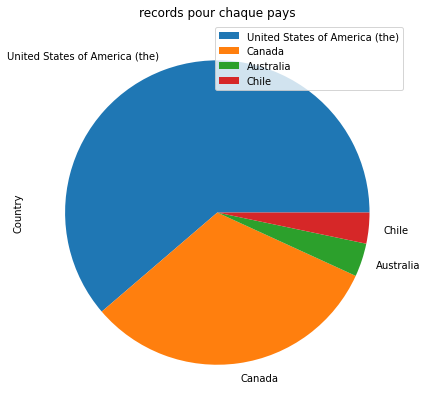

In [31]:
g = df_Country_count.plot.pie(y='Country', figsize=(7, 7))
g.set_title("records pour chaque pays")

Text(0.5, 1.0, 'records for each airport')

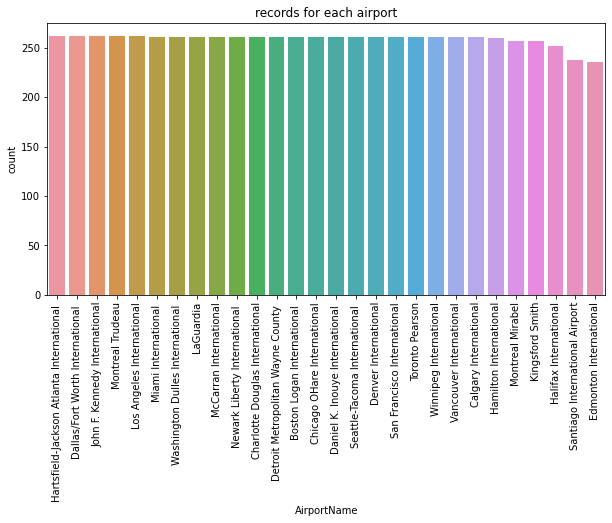

In [32]:
plt.figure(figsize=(10, 5))
g = sns.countplot(data=df_covid, x="AirportName",
              order = df_covid['AirportName'].value_counts().index)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title("records for each airport")

In [33]:
df_month_count = pd.DataFrame(df_covid["Date"].map(lambda d: d.month).value_counts())
df_month_count = df_month_count.reset_index()
df_month_count = df_month_count.rename(columns={"Date":"count", "index":"month"})

In [34]:
print(df_month_count)

   month  count
0     10    868
1      7    862
2      5    855
3      9    835
4      8    835
5     11    835
6      6    831
7      4    825
8      3    445
9     12     56


Text(0.5, 1.0, 'records for each month')

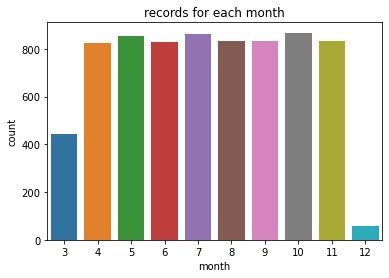

In [37]:
g = sns.barplot(data=df_month_count.reset_index(), y="count", x="month")
#g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title("records for each month")

Text(0.5, 1.0, 'records for each weekday')

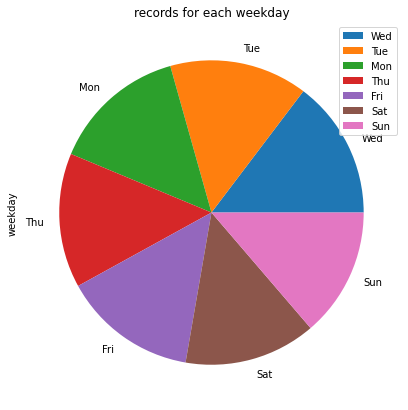

In [38]:
df_weekday_count = pd.DataFrame(df_covid["weekday"].value_counts())
g = df_weekday_count.plot.pie(y='weekday', figsize=(7, 7))
g.set_title("records for each weekday")

In [39]:
gdf = gpd.GeoDataFrame(df_covid_unique, 
                       geometry=gpd.points_from_xy(df_covid_unique.long, df_covid_unique.lat))

In [41]:
gdf.head()

,Date,AirportName,PercentOfBaseline,City,State,ISO_3166_2,Country,Geography,weekday,long,lat,geometry
0,2020-04-03,Kingsford Smith,64,Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",Fri,151.180088,-33.945977,POINT (151.18009 -33.94598)
1,2020-03-17,Santiago International Airport,72,Santiago,Santiago Province,CL,Chile,"POLYGON((-70.8043956756592 -33.3719683869737, ...",Tue,-70.794237,-33.390727,POINT (-70.79424 -33.39073)
2,2020-04-05,Calgary International,65,Calgary,Alberta,CA-AB,Canada,"POLYGON((-113.981866836548 51.1392131913567, -...",Sun,-114.013123,51.118475,POINT (-114.01312 51.11848)
3,2020-04-20,Edmonton International,46,Leduc County,Alberta,CA-AB,Canada,"POLYGON((-113.568120002747 53.3110445425655, -...",Mon,-113.576261,53.308783,POINT (-113.57626 53.30878)
4,2020-05-15,Vancouver International,68,Richmond,British Columbia,CA-BC,Canada,"POLYGON((-123.136525154114 49.1980971490671, -...",Fri,-123.177541,49.193579,POINT (-123.17754 49.19358)


In [46]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


Text(0.5, 1.0, 'example world map')

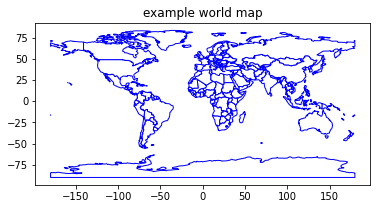

In [49]:
g = world.plot(color='white', edgecolor='blue')
g.set_title("example world map")

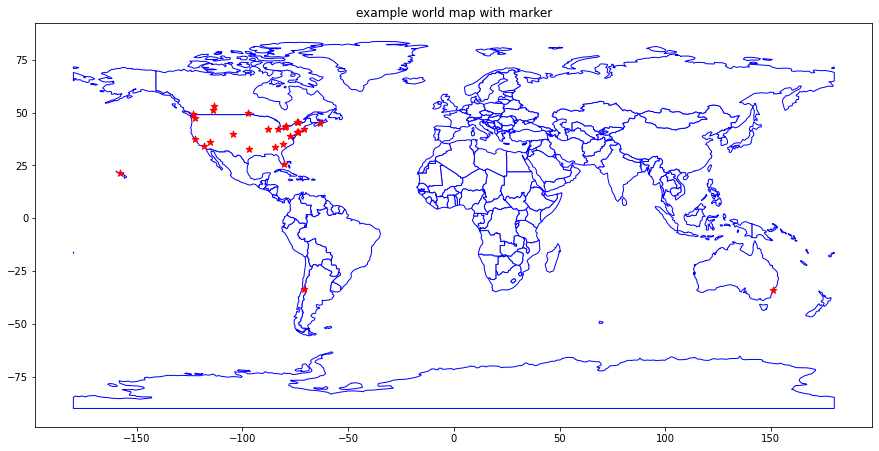

In [52]:
ax = world.plot(color='white', edgecolor='blue', figsize=(15, 10))
g = gdf.plot(ax=ax, marker='*', color='red', markersize=50)
g.set_title("example world map with marker")
plt.show()

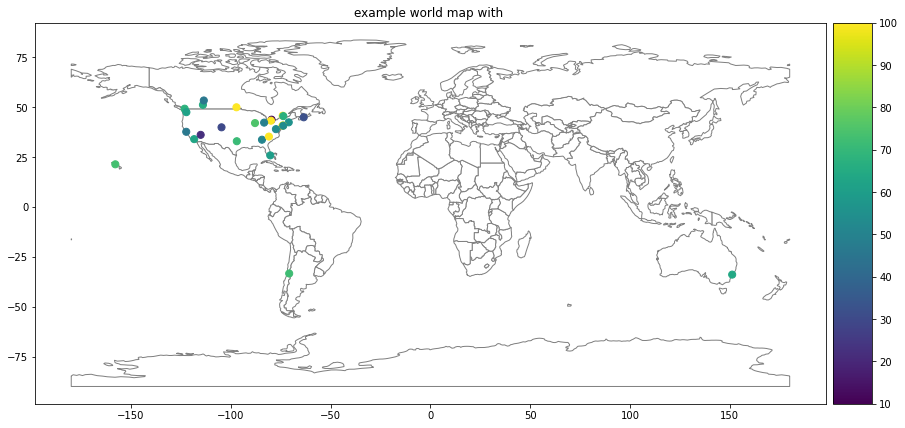

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

world.plot(ax=ax, color='white', edgecolor='gray')
g = gdf.plot(column='PercentOfBaseline', ax=ax, markersize=50, legend=True, cax=cax)
g.set_title("example world map with ")
plt.show()

In [62]:
df_airport_weekday_mean = df_covid[["AirportName", "weekday", "PercentOfBaseline"]].groupby(["AirportName", "weekday"]).mean()
df_airport_weekday_mean = df_airport_weekday_mean.reset_index()
df_airport_weekday_mean = df_airport_weekday_mean.merge(df_geometry, on="AirportName")

In [63]:
df_airport_weekday_mean.head()

,AirportName,weekday,PercentOfBaseline,City,State,ISO_3166_2,Country,long,lat
0,Boston Logan International,Fri,63.567568,Boston,Massachusetts,US-MA,United States of America (the),-71.010291,42.363633
1,Boston Logan International,Mon,64.162162,Boston,Massachusetts,US-MA,United States of America (the),-71.010291,42.363633
2,Boston Logan International,Sat,62.432432,Boston,Massachusetts,US-MA,United States of America (the),-71.010291,42.363633
3,Boston Logan International,Sun,63.351351,Boston,Massachusetts,US-MA,United States of America (the),-71.010291,42.363633
4,Boston Logan International,Thu,61.432432,Boston,Massachusetts,US-MA,United States of America (the),-71.010291,42.363633


In [64]:
df_airport_weekday_mean_sun = df_airport_weekday_mean[df_airport_weekday_mean["weekday"]=="Sun"]
gdf_airport_weekday_mean_sun = gpd.GeoDataFrame(df_airport_weekday_mean_sun, 
                                                geometry=gpd.points_from_xy(df_airport_weekday_mean_sun.long, df_airport_weekday_mean_sun.lat))

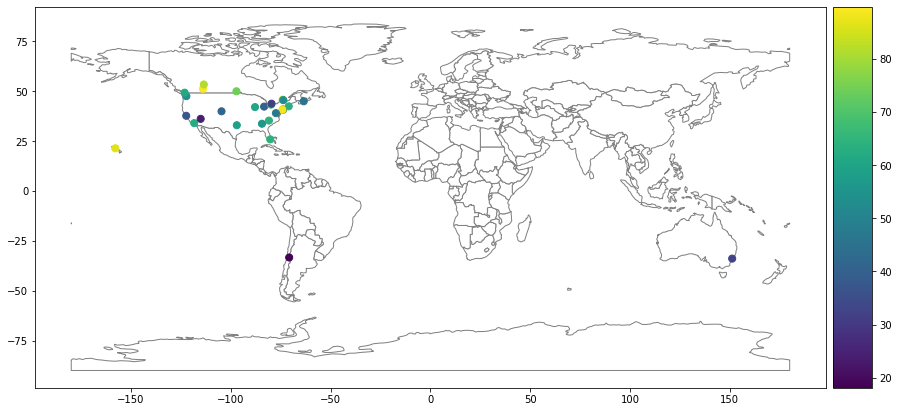

In [65]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

world.plot(ax=ax, color='white', edgecolor='gray')
gdf_airport_weekday_mean_sun.plot(column='PercentOfBaseline', ax=ax, markersize=50, legend=True, cax=cax)
plt.show()

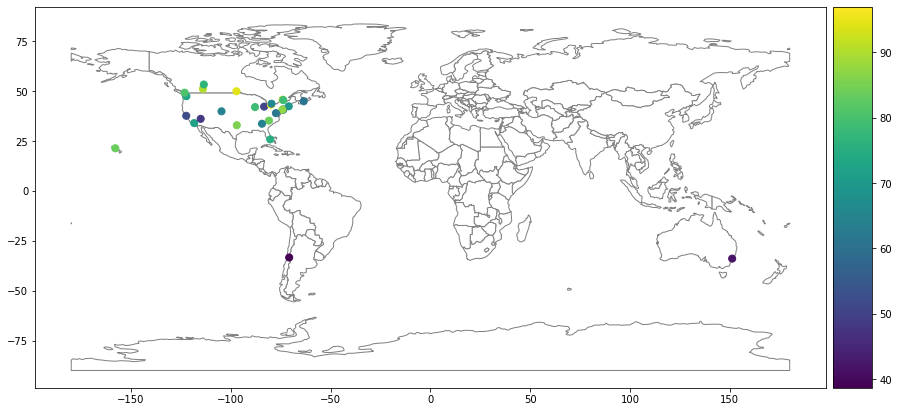

In [66]:
df_airport_weekday_mean_wed = df_airport_weekday_mean[df_airport_weekday_mean["weekday"]=="Wed"]
gdf_airport_weekday_mean_wed = gpd.GeoDataFrame(df_airport_weekday_mean_wed, 
                                                geometry=gpd.points_from_xy(df_airport_weekday_mean_wed.long, df_airport_weekday_mean_wed.lat))

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

world.plot(ax=ax, color='white', edgecolor='gray')
gdf_airport_weekday_mean_wed.plot(column='PercentOfBaseline', ax=ax, markersize=50, legend=True, cax=cax)
plt.show()

In [67]:
df_airport_date_mean = df_covid[["AirportName", "Date", "PercentOfBaseline"]]
df_airport_date_mean["Date"] = df_airport_date_mean["Date"].map(lambda d: d.month)
df_airport_date_mean = df_airport_date_mean.groupby(["AirportName", "Date"]).mean()
df_airport_date_mean = df_airport_date_mean.reset_index()
df_airport_date_mean = df_airport_date_mean.merge(df_geometry, on="AirportName")
df_airport_date_mean = df_airport_date_mean.rename(columns={"Date": "month"})

C:\Program Files\KMSpico\temp\ipykernel_19428\1044206123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airport_date_mean["Date"] = df_airport_date_mean["Date"].map(lambda d: d.month)


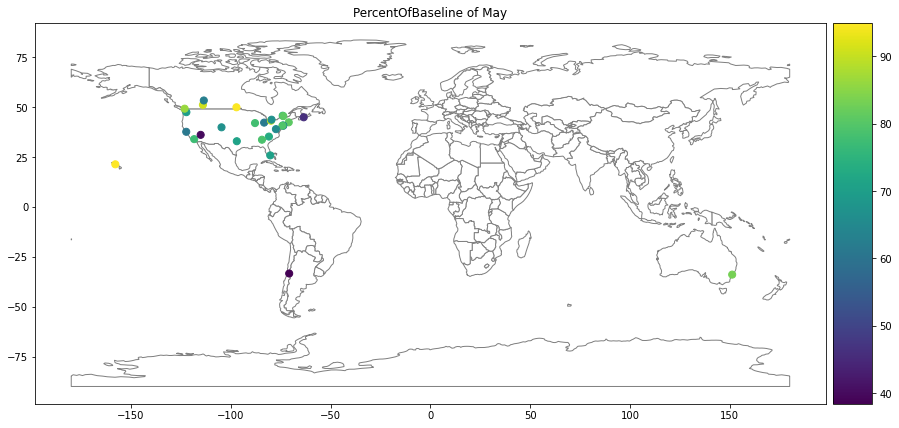

In [68]:
df_airport_date_mean_3 = df_airport_date_mean[df_airport_date_mean["month"]==3]
df_airport_date_mean_3 = gpd.GeoDataFrame(df_airport_date_mean_3, 
                                                geometry=gpd.points_from_xy(df_airport_date_mean_3.long, df_airport_date_mean_3.lat))

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

world.plot(ax=ax, color='white', edgecolor='gray')
g = df_airport_date_mean_3.plot(column='PercentOfBaseline', ax=ax, markersize=50, legend=True, cax=cax)
g.set_title("PercentOfBaseline of May")
plt.show()

In [69]:
df_airport_date_all_mean = df_covid.groupby(["AirportName"]).mean()
df_airport_date_all_mean = df_airport_date_all_mean.reset_index()

In [70]:
df_airport_date_all_mean.head()

,AirportName,PercentOfBaseline,long,lat
0,Boston Logan International,64.704981,-71.010291,42.363633
1,Calgary International,89.513410,-114.013123,51.118475
2,Charlotte Douglas International,75.375479,-80.947811,35.213689
3,Chicago OHare International,73.084291,-87.910595,41.980460
4,Dallas/Fort Worth International,75.293893,-97.039498,32.894059


In [75]:
fig = px.scatter_mapbox(df_airport_date_all_mean,
                        lat="lat",
                        lon="long",
                        hover_name="AirportName",
                        hover_data=["PercentOfBaseline"],
                        color="PercentOfBaseline",
                        zoom=1,
                        height=600,
                        size="PercentOfBaseline",
                        size_max=30,
                        opacity=0.4,
                        width=1300)
fig.update_layout(mapbox_style='stamen-terrain')
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.update_layout(title_text="Mean of trafic on sunday")
fig.show()

In [72]:
fig = px.scatter_mapbox(df_airport_date_all_mean,
                        lat="lat",
                        lon="long",
                        hover_name="AirportName",
                        hover_data=["PercentOfBaseline"],
                        color="PercentOfBaseline",
                        zoom=1,
                        height=600,
                        size="PercentOfBaseline",
                        size_max=30,
                        opacity=0.4,
                        width=1300)
fig.update_layout(mapbox_style='carto-positron')
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.update_layout(title_text="Mean of trafic on sunday")
fig.show()